In [1]:
import pandas as pd

In [2]:
import tensorflow as tf
import gensim
import numpy as np, scipy
print(tf.__version__, np.__version__, scipy.__version__, gensim.__version__)


2.20.0 1.26.4 1.13.1 4.3.3


In [3]:
#!pip install tensorflow

In [4]:
from tensorflow import keras
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential

In [37]:
train1=pd.read_csv("engtamilTrain.csv")
train1

,Unnamed: 0,en,ta
0,0,MMA vice president Qazi Hussain Ahmad declared...,MMA கட்சியின் துணைத்தலைவர் க்வாஸி ஹுசேன் அகமத்...
1,1,Information has surfaced in recent years sugge...,சமீபகாலத்தில் சில தகவல்கள் யூலியஸ் ரோசன்பேர்க...
2,2,And Azor begat Sadoc; and Sadoc begat Achim; a...,ஆசோர் சாதோக்கைப் பெற்றான்; சாதோக்கு ஆகீமைப் பெ...
3,3,"She says she knows what is going on, but can d...",என்ன நடக்கிறது என்பது தமக்கு தெரியும் என்றும் ...
4,4,"And be it indeed that I have erred, my error r...","நான் தப்பிநடந்தது மெய்யானாலும், என் தப்பிதம் எ..."
...,...,...,...
166866,166866,"Soon to be released, 'Silandhi' is produced by...",விரைவில் திரைக்கு வர இருக்கும் 'சிலந்தி' படத்த...
166867,166867,"An MHP deputy publicly stated, ""Let them die.""\n",தேசியவாத இயக்கங்களின் கட்சி (MHP) யின் உபதலைவர...
166868,166868,And Aaron shall make an atonement on the horns...,வருஷத்தில் ஒருமுறை ஆரோன் பாவநிவாரணபலியின் இரத்...
166869,166869,"Like the CWC, the UPF is part of the governmen...","இ.தொ.கா. போலவே, மலையக மக்கள் முன்னணியும் அரச..."


In [39]:
train1.drop('Unnamed: 0', axis=1)

,en,ta
0,MMA vice president Qazi Hussain Ahmad declared...,MMA கட்சியின் துணைத்தலைவர் க்வாஸி ஹுசேன் அகமத்...
1,Information has surfaced in recent years sugge...,சமீபகாலத்தில் சில தகவல்கள் யூலியஸ் ரோசன்பேர்க...
2,And Azor begat Sadoc; and Sadoc begat Achim; a...,ஆசோர் சாதோக்கைப் பெற்றான்; சாதோக்கு ஆகீமைப் பெ...
3,"She says she knows what is going on, but can d...",என்ன நடக்கிறது என்பது தமக்கு தெரியும் என்றும் ...
4,"And be it indeed that I have erred, my error r...","நான் தப்பிநடந்தது மெய்யானாலும், என் தப்பிதம் எ..."
...,...,...
166866,"Soon to be released, 'Silandhi' is produced by...",விரைவில் திரைக்கு வர இருக்கும் 'சிலந்தி' படத்த...
166867,"An MHP deputy publicly stated, ""Let them die.""\n",தேசியவாத இயக்கங்களின் கட்சி (MHP) யின் உபதலைவர...
166868,And Aaron shall make an atonement on the horns...,வருஷத்தில் ஒருமுறை ஆரோன் பாவநிவாரணபலியின் இரத்...
166869,"Like the CWC, the UPF is part of the governmen...","இ.தொ.கா. போலவே, மலையக மக்கள் முன்னணியும் அரச..."


In [36]:
train=pd.read_csv("engtamilTrain.csv")
train=train.drop(["Unnamed: 0"],axis=1)
english_sentences=train["en"]
tamil_sentence=train['ta']

In [6]:
english_sentences

0         MMA vice president Qazi Hussain Ahmad declared...
1         Information has surfaced in recent years sugge...
2         And Azor begat Sadoc; and Sadoc begat Achim; a...
3         She says she knows what is going on, but can d...
4         And be it indeed that I have erred, my error r...
                                ...                        
166866    Soon to be released, 'Silandhi' is produced by...
166867     An MHP deputy publicly stated, "Let them die."\n
166868    And Aaron shall make an atonement on the horns...
166869    Like the CWC, the UPF is part of the governmen...
166870    If I had been, the split would not have happen...
Name: en, Length: 166871, dtype: object

In [7]:
tamil_sentence

0         MMA கட்சியின் துணைத்தலைவர் க்வாஸி ஹுசேன் அகமத்...
1         சமீபகாலத்தில் சில தகவல்கள் யூலியஸ் ரோசன்பேர்க...
2         ஆசோர் சாதோக்கைப் பெற்றான்; சாதோக்கு ஆகீமைப் பெ...
3         என்ன நடக்கிறது என்பது தமக்கு தெரியும் என்றும் ...
4         நான் தப்பிநடந்தது மெய்யானாலும், என் தப்பிதம் எ...
                                ...                        
166866    விரைவில் திரைக்கு வர இருக்கும் 'சிலந்தி' படத்த...
166867    தேசியவாத இயக்கங்களின் கட்சி (MHP) யின் உபதலைவர...
166868    வருஷத்தில் ஒருமுறை ஆரோன் பாவநிவாரணபலியின் இரத்...
166869    இ.தொ.கா. போலவே, மலையக மக்கள் முன்னணியும் அரச...
166870    அந்த சமயம் மட்டும் நான் இங்கே இருந்திருந்தா அந...
Name: ta, Length: 166871, dtype: object

In [44]:
#Taking only few rows from english and tamil due to computational restrictions
english_sentences=english_sentences.head(300)
tamil_sentences=tamil_sentence.head(300)

In [45]:
english_sentences

0      MMA vice president Qazi Hussain Ahmad declared...
1      Information has surfaced in recent years sugge...
2      And Azor begat Sadoc; and Sadoc begat Achim; a...
3      She says she knows what is going on, but can d...
4      And be it indeed that I have erred, my error r...
                             ...                        
295    Targeting men between 25 and 30, the announcem...
296    And in the four and twentieth day of the first...
297    William Pitt, 'the Younger,' publicly aligned ...
298    Prashant's father Thiagarajan is proud when he...
299    Let them be confounded and put to shame that s...
Name: en, Length: 300, dtype: object

In [10]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [11]:
#pip show numpy

In [12]:
#pip show scipy

In [13]:
#pip show tensorflow

In [14]:
#pip list | findstr "tensorflow numpy scipy gensim"

In [15]:
#pip uninstall -y tensorflow numpy scipy gensim

#TOKENISATION

In [16]:
dataset = english_sentences

# convert each sentence to a list of words
sentences = [sentence.split() for sentence in dataset]

# print the result
print(sentences)

[['MMA', 'vice', 'president', 'Qazi', 'Hussain', 'Ahmad', 'declared', 'last', 'month:', "'We", 'are', 'not', 'extremists.'], ['Information', 'has', 'surfaced', 'in', 'recent', 'years', 'suggesting', 'that', 'Julius', 'Rosenberg', 'was', 'involved', 'in', 'passing', 'some', 'form', 'of', 'intelligence', 'to', 'Soviet', 'officials', 'during', 'the', 'Second', 'World', 'War.'], ['And', 'Azor', 'begat', 'Sadoc;', 'and', 'Sadoc', 'begat', 'Achim;', 'and', 'Achim', 'begat', 'Eliud;'], ['She', 'says', 'she', 'knows', 'what', 'is', 'going', 'on,', 'but', 'can', 'do', 'nothing', 'about', 'it.'], ['And', 'be', 'it', 'indeed', 'that', 'I', 'have', 'erred,', 'my', 'error', 'remains', 'with', 'myself.'], ['Finally,', 'the', 'columnist', 'fails', 'to', 'tell', 'us', 'who', 'among', 'the', 'political', 'leaders', 'of', 'the', 'bourgeoisie,', 'past', 'and', 'present,', 'he', 'counts', 'among', 'the', 'paragons', 'of', 'morality.'], ['These', 'include', 'the', 'British', 'Tamil', 'Forum,', 'La', 'Maiso

In [17]:
english_sentences[0].split()

['MMA',
 'vice',
 'president',
 'Qazi',
 'Hussain',
 'Ahmad',
 'declared',
 'last',
 'month:',
 "'We",
 'are',
 'not',
 'extremists.']

In [18]:
def sent_Token(sentence):
        # define your dataset
    dataset = sentence

    # convert each sentence to a list of words
    sentences = [sentence.split() for sentence in dataset]

    # print the result
    print(sentences)
    
    return sentences

In [19]:
engSentence=sent_Token(english_sentences)
engSentence

[['MMA', 'vice', 'president', 'Qazi', 'Hussain', 'Ahmad', 'declared', 'last', 'month:', "'We", 'are', 'not', 'extremists.'], ['Information', 'has', 'surfaced', 'in', 'recent', 'years', 'suggesting', 'that', 'Julius', 'Rosenberg', 'was', 'involved', 'in', 'passing', 'some', 'form', 'of', 'intelligence', 'to', 'Soviet', 'officials', 'during', 'the', 'Second', 'World', 'War.'], ['And', 'Azor', 'begat', 'Sadoc;', 'and', 'Sadoc', 'begat', 'Achim;', 'and', 'Achim', 'begat', 'Eliud;'], ['She', 'says', 'she', 'knows', 'what', 'is', 'going', 'on,', 'but', 'can', 'do', 'nothing', 'about', 'it.'], ['And', 'be', 'it', 'indeed', 'that', 'I', 'have', 'erred,', 'my', 'error', 'remains', 'with', 'myself.'], ['Finally,', 'the', 'columnist', 'fails', 'to', 'tell', 'us', 'who', 'among', 'the', 'political', 'leaders', 'of', 'the', 'bourgeoisie,', 'past', 'and', 'present,', 'he', 'counts', 'among', 'the', 'paragons', 'of', 'morality.'], ['These', 'include', 'the', 'British', 'Tamil', 'Forum,', 'La', 'Maiso

[['MMA',
  'vice',
  'president',
  'Qazi',
  'Hussain',
  'Ahmad',
  'declared',
  'last',
  'month:',
  "'We",
  'are',
  'not',
  'extremists.'],
 ['Information',
  'has',
  'surfaced',
  'in',
  'recent',
  'years',
  'suggesting',
  'that',
  'Julius',
  'Rosenberg',
  'was',
  'involved',
  'in',
  'passing',
  'some',
  'form',
  'of',
  'intelligence',
  'to',
  'Soviet',
  'officials',
  'during',
  'the',
  'Second',
  'World',
  'War.'],
 ['And',
  'Azor',
  'begat',
  'Sadoc;',
  'and',
  'Sadoc',
  'begat',
  'Achim;',
  'and',
  'Achim',
  'begat',
  'Eliud;'],
 ['She',
  'says',
  'she',
  'knows',
  'what',
  'is',
  'going',
  'on,',
  'but',
  'can',
  'do',
  'nothing',
  'about',
  'it.'],
 ['And',
  'be',
  'it',
  'indeed',
  'that',
  'I',
  'have',
  'erred,',
  'my',
  'error',
  'remains',
  'with',
  'myself.'],
 ['Finally,',
  'the',
  'columnist',
  'fails',
  'to',
  'tell',
  'us',
  'who',
  'among',
  'the',
  'political',
  'leaders',
  'of',
  'the',


In [20]:
#MODEL Creation
model= Word2Vec(engSentence,min_count=1)
print(model)

Word2Vec<vocab=616, vector_size=100, alpha=0.025>


In [21]:
# save model
model.save("model.bin")

🔹 model.wv

This is a KeyedVectors object that holds just the learned word vectors and related utilities.

It does not include the full Word2Vec training model (so it’s lightweight if you save it separately).

🔹 model.wv.vectors

This is a NumPy array of shape (vocab_size, vector_size).

Each row = the embedding of one word in your vocabulary.

In [22]:
model.wv.vectors

array([[-8.5269538e-04,  1.1604264e-03,  5.5897208e-03, ...,
        -8.5684527e-03,  1.8357253e-03,  5.8899135e-03],
       [-8.7478105e-03,  4.0949644e-03,  5.4718079e-03, ...,
        -3.0855590e-03, -9.0877758e-03,  4.1792495e-03],
       [-9.4409588e-05,  3.7235064e-03, -6.4972108e-03, ...,
        -3.2415762e-04,  8.7957950e-03, -7.4858963e-03],
       ...,
       [-4.6322020e-03, -9.4783371e-03, -6.1461427e-03, ...,
         5.3006876e-03,  1.9470252e-03,  5.7738852e-03],
       [-4.2769974e-03,  7.4411076e-03, -5.2333329e-05, ...,
         6.3675381e-03,  6.3411519e-03,  5.0941561e-03],
       [ 6.1332677e-03, -7.9151653e-03,  4.7477044e-04, ...,
        -1.8317474e-03, -4.9491259e-03, -3.7649954e-03]], dtype=float32)

In [23]:
model.wv.vectors.shape

(616, 100)

In [24]:
X = model.wv.vectors  # corrected line
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [25]:
result

array([[ 0.00523129,  0.00286081],
       [ 0.01492673,  0.00734274],
       [-0.00593993, -0.00818061],
       ...,
       [-0.01353043, -0.01182259],
       [-0.00324296, -0.01436866],
       [-0.01009559,  0.0026985 ]], dtype=float32)

In [26]:
result.shape

(616, 2)

In [28]:
result[260]

array([-0.00129354, -0.00939403], dtype=float32)

In [29]:
model.wv

In [30]:
model.wv.index_to_key

['the',
 'and',
 'of',
 'to',
 'in',
 'that',
 'with',
 'for',
 'was',
 'a',
 'he',
 'have',
 'is',
 'I',
 'as',
 'it',
 'And',
 'his',
 'The',
 'on',
 'are',
 'these',
 'Tamil',
 'at',
 'But',
 'not',
 'my',
 'will',
 'about',
 'be',
 'their',
 'has',
 'had',
 'which',
 'how',
 'begat',
 'Hindi',
 'who',
 'going',
 'she',
 'declared',
 'we',
 'government',
 'them,',
 'city',
 'Vietnam',
 'they',
 'Lord',
 'said',
 'one',
 'your',
 'from',
 'US',
 'past',
 'this',
 'public',
 'so',
 'up',
 'political',
 'being',
 'among',
 'him',
 'life',
 'me',
 'language',
 'presidential',
 'sent',
 'working',
 'These',
 'class',
 'British',
 'Hussain',
 'financial',
 'you,',
 'films.',
 'him,',
 'two',
 'elections,',
 'year,',
 'its',
 'many',
 'us',
 'bought',
 'great',
 'blood',
 'War.',
 'her,',
 'percent',
 'Soviet',
 'even',
 'things',
 'saw',
 'own',
 'where',
 'brought',
 'living',
 'In',
 'what',
 'might',
 'edge',
 'respects',
 'men',
 'when',
 "'We",
 'name',
 'A',
 'sit',
 'nothing',
 'do

In [31]:
len(model.wv.index_to_key)

616

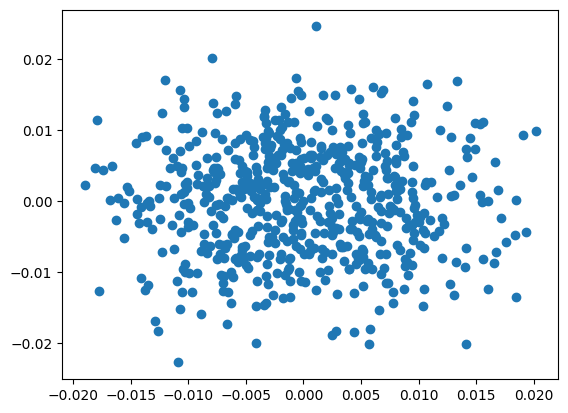

In [32]:
from matplotlib import pyplot as plt
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)

In [33]:
words

['the',
 'and',
 'of',
 'to',
 'in',
 'that',
 'with',
 'for',
 'was',
 'a',
 'he',
 'have',
 'is',
 'I',
 'as',
 'it',
 'And',
 'his',
 'The',
 'on',
 'are',
 'these',
 'Tamil',
 'at',
 'But',
 'not',
 'my',
 'will',
 'about',
 'be',
 'their',
 'has',
 'had',
 'which',
 'how',
 'begat',
 'Hindi',
 'who',
 'going',
 'she',
 'declared',
 'we',
 'government',
 'them,',
 'city',
 'Vietnam',
 'they',
 'Lord',
 'said',
 'one',
 'your',
 'from',
 'US',
 'past',
 'this',
 'public',
 'so',
 'up',
 'political',
 'being',
 'among',
 'him',
 'life',
 'me',
 'language',
 'presidential',
 'sent',
 'working',
 'These',
 'class',
 'British',
 'Hussain',
 'financial',
 'you,',
 'films.',
 'him,',
 'two',
 'elections,',
 'year,',
 'its',
 'many',
 'us',
 'bought',
 'great',
 'blood',
 'War.',
 'her,',
 'percent',
 'Soviet',
 'even',
 'things',
 'saw',
 'own',
 'where',
 'brought',
 'living',
 'In',
 'what',
 'might',
 'edge',
 'respects',
 'men',
 'when',
 "'We",
 'name',
 'A',
 'sit',
 'nothing',
 'do

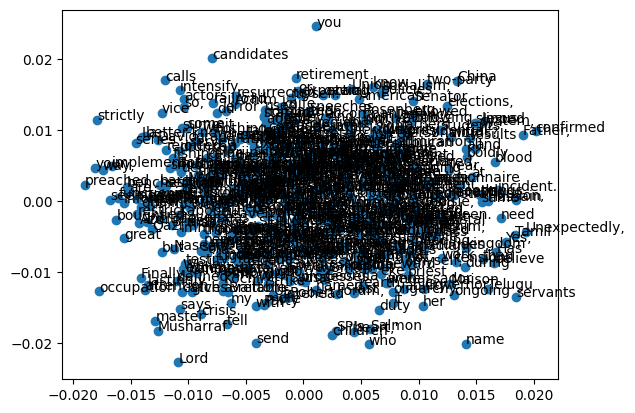

In [34]:
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [40]:
def ownWordModel(langsentence,modelname):
    from gensim.models import Word2Vec
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    model = Word2Vec(langsentence, min_count=1)
    print(model)
    # save model
    model.save(modelname)
    # fit a 2d PCA model to the vectors
    X = model.wv.vectors  # corrected line
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)

    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    words = list(model.wv.index_to_key)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.show()

Word2Vec<vocab=616, vector_size=100, alpha=0.025>


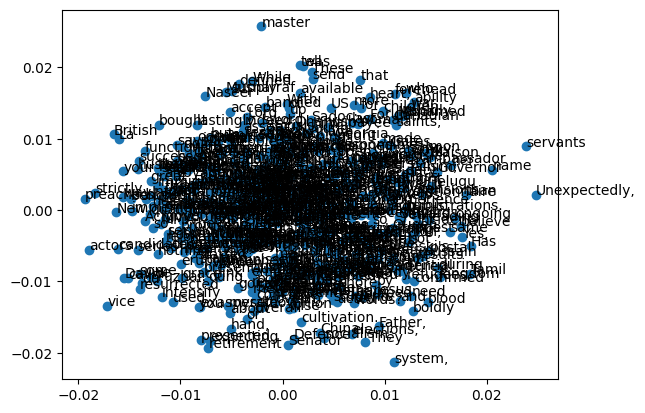

In [46]:
ownWordModel(engSentence,"engmodel.bin")

In [42]:
tamSentence=sent_Token(tamil_sentences)
tamSentence

[['MMA', 'கட்சியின்', 'துணைத்தலைவர்', 'க்வாஸி', 'ஹுசேன்', 'அகமத்', 'சென்ற', 'மாதம்', 'பின்வருமாறு', 'அறிவித்தார்:', '``நாங்கள்', 'தீவிரவாதிகள்', 'அல்ல.'], ['சமீபகாலத்தில்', 'சில', 'தகவல்கள்', 'யூலியஸ்', 'ரோசன்பேர்க்', 'ஒரு', 'வித', 'உளவுச்செய்தியை', 'சோவியத்', 'அதிகாரிகளுக்கு', 'இரண்டாம்', 'உலகப்போரின்போது', 'அனுப்பியதில்', 'சம்பந்தப்பட்டு', 'இருந்ததாக', 'வெளிவந்துள்ளன.'], ['ஆசோர்', 'சாதோக்கைப்', 'பெற்றான்;', 'சாதோக்கு', 'ஆகீமைப்', 'பெற்றான்;', 'ஆகீம்', 'எலியூதைப்', 'பெற்றான்;'], ['என்ன', 'நடக்கிறது', 'என்பது', 'தமக்கு', 'தெரியும்', 'என்றும்', 'ஆனால்,', 'தம்மால்', 'எதுவும்', 'செய்யமுடியாது', 'என்றும்', 'கடிதம்', 'எழுதியிருந்தார்.'], ['நான்', 'தப்பிநடந்தது', 'மெய்யானாலும்,', 'என்', 'தப்பிதம்', 'என்னோடேதான்', 'இருக்கிறது'], ['டால்ரிம்பிளினுடைய', 'அறிவுஜீவித்', 'தொடுவானத்திற்கு', 'அப்பால்', 'எவ்வளவோ', 'தொலைவில்', 'இருந்தன'], ['இந்த', 'அமைப்புக்களில்', 'British', 'Tamil', 'Forum,', 'La', 'Maison', 'du', 'Tamil', 'Eelam', '(France),', 'the', 'Canadian', 'Tamil', 'Congress,', 'Swiss',

[['MMA',
  'கட்சியின்',
  'துணைத்தலைவர்',
  'க்வாஸி',
  'ஹுசேன்',
  'அகமத்',
  'சென்ற',
  'மாதம்',
  'பின்வருமாறு',
  'அறிவித்தார்:',
  '``நாங்கள்',
  'தீவிரவாதிகள்',
  'அல்ல.'],
 ['சமீபகாலத்தில்',
  'சில',
  'தகவல்கள்',
  'யூலியஸ்',
  'ரோசன்பேர்க்',
  'ஒரு',
  'வித',
  'உளவுச்செய்தியை',
  'சோவியத்',
  'அதிகாரிகளுக்கு',
  'இரண்டாம்',
  'உலகப்போரின்போது',
  'அனுப்பியதில்',
  'சம்பந்தப்பட்டு',
  'இருந்ததாக',
  'வெளிவந்துள்ளன.'],
 ['ஆசோர்',
  'சாதோக்கைப்',
  'பெற்றான்;',
  'சாதோக்கு',
  'ஆகீமைப்',
  'பெற்றான்;',
  'ஆகீம்',
  'எலியூதைப்',
  'பெற்றான்;'],
 ['என்ன',
  'நடக்கிறது',
  'என்பது',
  'தமக்கு',
  'தெரியும்',
  'என்றும்',
  'ஆனால்,',
  'தம்மால்',
  'எதுவும்',
  'செய்யமுடியாது',
  'என்றும்',
  'கடிதம்',
  'எழுதியிருந்தார்.'],
 ['நான்',
  'தப்பிநடந்தது',
  'மெய்யானாலும்,',
  'என்',
  'தப்பிதம்',
  'என்னோடேதான்',
  'இருக்கிறது'],
 ['டால்ரிம்பிளினுடைய',
  'அறிவுஜீவித்',
  'தொடுவானத்திற்கு',
  'அப்பால்',
  'எவ்வளவோ',
  'தொலைவில்',
  'இருந்தன'],
 ['இந்த',
  'அமைப்புக்களில்',
  'Bri

Word2Vec<vocab=3483, vector_size=100, alpha=0.025>


C:\anaconda3\envs\NLP\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2962 (\N{TAMIL LETTER O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\envs\NLP\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Tamil natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\envs\NLP\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2992 (\N{TAMIL LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\envs\NLP\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3009 (\N{TAMIL VOWEL SIGN U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\envs\NLP\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2990 (\N{TAMIL LETTER MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\envs\NLP\lib\site-packages\I

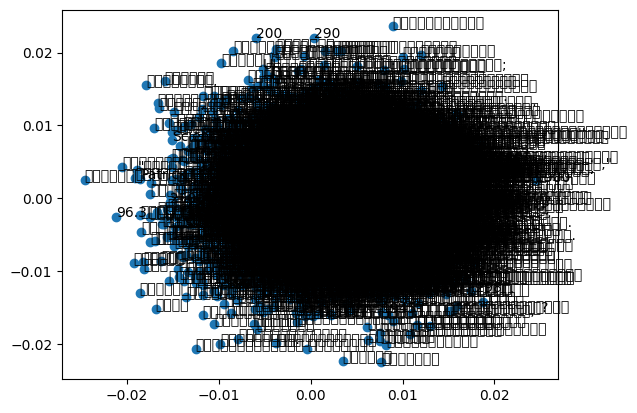

In [43]:
ownWordModel(tamSentence,"tammodel.bin")

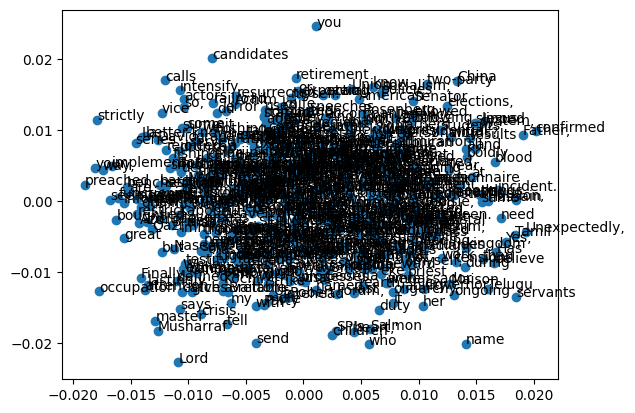

In [48]:
plt.scatter(result[:, 0], result[:, 1])
words = model.wv.index_to_key
for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

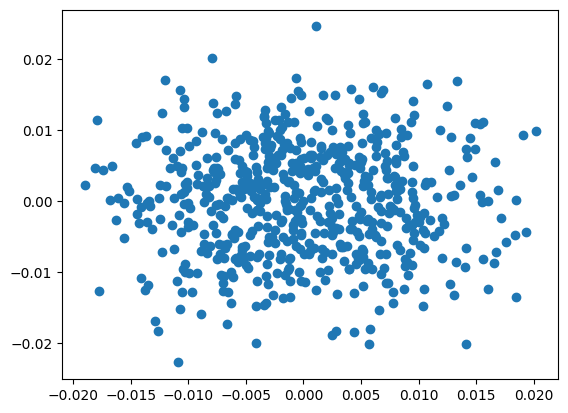

In [49]:
plt.scatter(result[:, 0], result[:, 1])

#plt.annotate(word, xy=(result[i, 0], result[i, 1]))
# result[i,0] is treated as x and result[i,1] is treated as y

# BECAUSE THE 2D ARRAY OF RESULT VARIABLE HAS X IN 0TH COLUMN AND Y IN 1ST COLUMN FOR EACH DATA POINT